## Домашнее задание

### Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def calc_mse(y, y_pred):
    """
    Функция реализует функционал ошибки MSE    
    """
    err = np.mean((y - y_pred)**2)
    return err

def min_max_scale(X):
    """
    Масштабирование признаков методом нормализации    
    """
    return (X - X.min()) / (X.max() - X.min())

def standard_scale(X):
    """
    Масштабирование признаков методом стандартизации    
    """
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

def gradient_descent_reg_l2(X, y, iterations, epsilon=1e-6 , eta=1e-3, reg=1e-8):
    """
    Функция реализует метод градиентного спуска с применением L_2-регуляризации    
    """
    # зададим начальную разницу весов большим числом
    weight_epsilon = np.inf
    
    W = np.random.randn(X.shape[1])
    l = X.shape[0]
    i = 0
    
    while weight_epsilon > epsilon and i < iterations:
        i+=1 
        W_back = W.copy()
        y_pred = np.dot(X, W_back)
        err = calc_mse(y, y_pred) 
        dQ = 2/l * X.T @ (y_pred - y) # градиент функции ошибки  
        dReg = reg * W # градиент регуляризацииreg
        W -= eta * (dQ + dReg)        
        weight_epsilon = np.linalg.norm(W - W_back, ord=2)               

    #print(f'Final MSE: {calc_mse(y, np.dot(X, W))}, Iter: {i}, weights: {W}, reg: {reg}')
    return W

def variable_dependency(X_norm, y, count = 3):
    """
    Функция генерирует массив коэффициентов и значение коэффициента регуляризации    
    """
    coeff = []
    reg = np.linspace(0, 10, num = count)
    for i in reg:
        w = gradient_descent_reg_l2(X_norm, y, iterations=50000, epsilon=1e-4, eta=1e-1, reg=i)
        coeff.append(np.append(w,i))
    return np.array(coeff)  


def plot_variable_dependency(x,y):
    """
    Функция строит графики зависимости весов всех признаков от lambda    
    """
    max_x = x.max()
    max_y = y.max()
    min_x = x.min()
    min_y = y.min()
    plt.title(f'Зависимость $w_{i}$ от \u03BB')
    plt.xlabel("\u03BB")
    plt.ylabel(f'$w_{i}$')
    plt.ylim(min_y, max_y)
    plt.xlim(min_x,max_x)
    plt.plot(x, y, color='g')
    plt.show()

In [28]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [29]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [30]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [31]:
coeff = variable_dependency(X_norm, y, count=100)

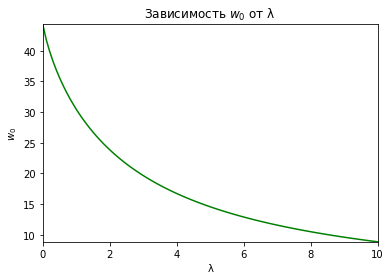

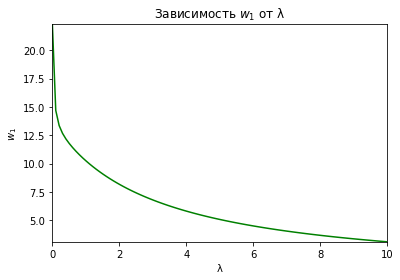

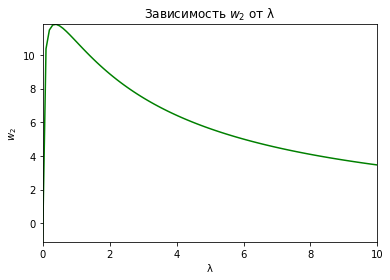

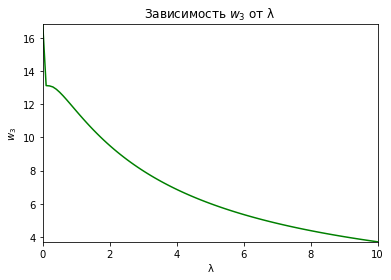

In [32]:
items = coeff.shape[1]-1
for i in range(0,items):
    plot_variable_dependency(coeff[:,items], coeff[:,i])

### Вывод:
По графикам можно сделать вывод, что при увеличении значения коэффициента регуляризации все весовые коэффициенты стремятся к нулю.